# In-Class Quiz Nº 2

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: ruben santos
## Number: A49063

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q2.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: MNIST dataset (small version) - pickle file $\texttt{MNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($1000\times784$  uint8 array)
* ### y1: classes of the training data (numbers 0 to 9)
* ### X2: test data ($5000\times784$ uint8 array)
* ### y2: classes of the test data (numbers 0 to 9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import pickle

#load data
D=pickle.load(open('MNISTsmall.p','rb'))
X1=D.X1*1.  #train
X2=D.X2*1.
y1=D.y1 #
y2=D.y2

In [2]:
X1.shape

(10000, 784)

In [3]:
X2.shape

(5000, 784)

In [4]:
y1.shape

(10000,)

In [5]:
y2.shape

(5000,)

# Question 1: Binary Classification
##  Consider the examples of class three (3) as the positive class and the remaning classes as the negative examples.
### a) Use the training set to find which dimensions of the data have a variance less than one hundred (100). Print this number and remove these dimensions from the training and test sets.
### b) Use the training data to train a $\texttt{LinearSVC}$ classifier with the following parameters: $\texttt{random_state=42}$ and $\texttt{C=0.1}$. Print the total number of errors and the confusion matrix for the test data.
### c) Plot the ROC curve of this classifier with the test data. Include in this plot the operating point of the classifier.
### d) Pre-process the data of item 1.a) using the function  $\texttt{StandardScaler}$. Train this function with the training data and apply the transformation to the training and test sets. Use the new training data to train a $\texttt{LinearSVC}$ classifier with the following parameters: $\texttt{random_state=42}$ and $\texttt{C=0.1}$. Print the total number of errors and the confusion matrix for the new test data.
### e) In the same figure, plot the ROC curves of the classifiers of item 1.b) and 1.d) with the respective test data. Include in this plot the operational points of both classifiers.

In [41]:
#binary labels
y1b=(y1==3)*1 # positive
y2b=(y2==3)*1 

## 1.a)

In [42]:
#QUantos e remove
#X1.var(axis=0) < 100
antes = X1.shape[1]
X1=X1[:,  X1.var(axis=0) < 100]
X2=X2[:,  X1.var(axis=0) < 100]
print("dimension:", antes -  X1.shape[1])

#X1=X1[:,true]
#X2=X2[:,true]

#(Xtrain,ytrain),(Xtest,ytest) =   (X1, y1),    (X2, y2)   
#np.voar?
#748

dimension: 0


## 1.b)

In [48]:
model=LinearSVC(random_state=42, C=0.1).fit(X1, y1b)
y2e=model.predict(X2)

print('Total number of errors',np.sum(y2b!=y2e))
print('Confusion Matrix:')
matrix= confusion_matrix(y2b,y2e)
print(matrix)

Total number of errors 506
Confusion Matrix:
[[4479   21]
 [ 485   15]]


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## 1.c)

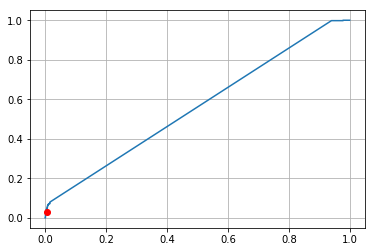

In [52]:
df = model.decision_function(X2)
fpr, tpr, t = roc_curve(y2b, df)

fp = matrix[0][1] / (matrix[0][0] + matrix[0][1])
tp = matrix[1][1] / (matrix[1][0] + matrix[1][1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot(fp, tp, "or")
plt.grid(True)




In [ ]:
#fp-rate=FP/(FP+TN) - falso positivo
p1=0
#tp-rate=TP/(TP+FN)
p2=60/(3+60) #recall

plt.figure(figsize=(6,6))
plt.plot(p1,p2,'ok')
plt.plot(fpr,tpr)
plt.axis('scaled')
plt.grid(True)

## 1.d)

In [53]:
#menos de 100 e sacler
#matrix
#(Xtrain,ytrain),(Xtest,ytest) =   (X1, y1),    (X2, y2)   
sc=StandardScaler().fit(X1)
X1S=sc.transform(X1)
X2S=sc.transform(X2)


model=LinearSVC(random_state=42, C=0.1).fit(X1S, y1b)
y2ee=model.predict(X2)

print('Total number of errors',np.sum(y2b!=y2ee))
print('Confusion Matrix:')
matrix2 = confusion_matrix(y2b,y2ee)
print(matrix2)

Total number of errors 503
Confusion Matrix:
[[4470   30]
 [ 473   27]]


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## 1.e)

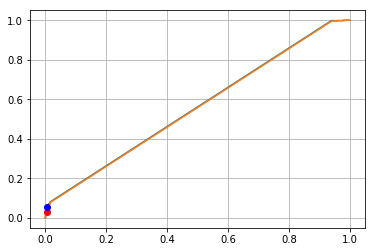

In [55]:
df2 = model.decision_function(X2S)
fpr2, tpr2, t2 = roc_curve(y2b, df2)

fp2 = matrix2[0][1] / (matrix2[0][0] + matrix2[0][1])
tp2 = matrix2[1][1] / (matrix2[1][0] + matrix2[1][1])

plt.figure()
plt.plot(fpr, tpr) 
plt.plot(fpr2, tpr2)
plt.plot(fp, tp, "or") 
plt.plot(fp2, tp2, "ob")  
plt.grid(True)


<hr style="border:2px solid black"> </hr>

# Question 2 - Multi-Class Classification:
## Consider the original train and test datasets form the $\texttt{MNISTsmall.p}$ (10 classes).
### a) Pre-process the data using the function  $\texttt{PCA}$. Train this function with the training data and apply the transformation to the training and test sets. Preseve only the first 50 principal componentes of the data. Use the pre-processed data in the following items.
### b) Train with the training set a $\texttt{RandomForestClassifier}$ with the following parameters: $\texttt{random_state=42}$ and $\texttt{max_depth=10}$. Print the total number of errors and the confusion matrix for the test data.
### c)  Divide the training set in two: a training and a validation set. Use the function $\texttt{train_test_split}$ with the following parameters: $\texttt{train_size=7000}$, $\texttt{random_state=42}$ and $\texttt{stratify=y1}$
### d) Use the training set of the previous item to train the $\texttt{RandomForestClassifier}$ (with $\texttt{random_state=42}$ and $\texttt{max_depth=10}$) and check which value for the parameter $\texttt{n_estimators}$ gives the best score in the validation set. Test the following values for the parameter $\texttt{n_estimators}$: 200, 225, 250, 275 and 300.
### e) Re-train with the whole training set (10000 examples) the $\texttt{RandomForestClassifier}$ (with $\texttt{random_state=42}$ and $\texttt{max_depth=10}$) with the best value obtained in the previous item for the parameter $\texttt{n_estimators}$.  Print the total number of errors and the confusion matrix for the test data.

## 2.a)

In [56]:
#from sklearn.decomposition import PCA

pca=PCA(n_components=50, whiten=True).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)


Nº of Principal Components to kept: 50


## 2.b)

In [57]:
model = RandomForestClassifier(random_state=42, max_depth=10).fit(X1p,y1)
y2eR= model.predict(X2p)

print('Total number of errors',np.sum(y2!=y2eR))
print('Confusion Matrix:')
print(confusion_matrix(y2,y2eR))

Total number of errors 4235
Confusion Matrix:
[[  0 498   0   0   0   0   1   1   0   0]
 [  0 500   0   0   0   0   0   0   0   0]
 [  0 428  53   3   2   0   9   1   0   4]
 [  0 459   3  36   0   0   1   1   0   0]
 [  2 470   5  10   5   3   0   3   0   2]
 [  0 443   2   1   0  47   2   1   3   1]
 [  0 436  12   3   0   6  43   0   0   0]
 [  0 424   1   4   2   1   0  64   0   4]
 [  0 490   2   0   0   7   0   1   0   0]
 [  1 474   2   0   1   0   0   5   0  17]]


## 2.c)

In [59]:

Xtrain0, Xvalid, ytrain0, yvalid= train_test_split(X1p, y1, test_size=7000, random_state=42, stratify=y1)


## 2.d)

In [62]:

topScore=0
for i in [200, 225, 250, 275, 300]:
    sgd=RandomForestClassifier(n_estimators=i, max_depth=10, random_state=42).fit(Xtrain0, ytrain0)
    currentScore=sgd.score(Xvalid,yvalid)
    if currentScore>topScore:
        topScore=currentScore
        best_estimator=i
        
print("score:", topScore)
print("Best estimator:", best_estimator)


score: 0.15157142857142858
Best estimator: 225


## 2.e)

In [67]:
sgd=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42).fit(X1p, y1)

y2e = sgd.predict(X2p)
print('Total number of errors',np.sum(y2!=y2e)) # nuermor de erros
print('Confusion Matrix:')
print(confusion_matrix(y2,y2e))

Total number of errors 4236
Confusion Matrix:
[[  0 498   0   0   0   0   1   1   0   0]
 [  0 500   0   0   0   0   0   0   0   0]
 [  0 428  53   3   2   0   9   1   0   4]
 [  0 459   3  36   0   0   1   1   0   0]
 [  2 470   6  10   5   3   0   3   0   1]
 [  0 443   2   1   0  47   2   1   3   1]
 [  0 436  11   4   0   6  43   0   0   0]
 [  0 424   1   5   2   1   0  63   0   4]
 [  0 490   3   0   0   6   0   1   0   0]
 [  1 474   3   0   0   0   0   5   0  17]]
